In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

In [4]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [5]:
# pandas, pandas_datareader, numpy and matplotlib
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

In [7]:
#Loading data
stk_tickers=['MSFT','IBM','GOOGL']
ccy_tickers=['DEXJPUS','DEXUSUK']
idx_tickers=['SP500','DJIA','VIXCLS']


In [8]:
import yfinance as yf
#stk_data= web.DataReader(stk_tickers, 'yahoo')
stk_data=yf.download(stk_tickers, start="2010-01-01", end="2020-01-01")

[*********************100%***********************]  3 of 3 completed


In [9]:
stk_data.head(5)

Adj Close                            Close                         \
                GOOGL        IBM       MSFT      GOOGL         IBM       MSFT   
Date                                                                            
2010-01-04  15.684434  80.328026  23.623901  15.684434  126.625237  30.950001   
2010-01-05  15.615365  79.357704  23.631531  15.615365  125.095604  30.959999   
2010-01-06  15.221722  78.842171  23.486504  15.221722  124.282982  30.770000   
2010-01-07  14.867367  78.569275  23.242249  14.867367  123.852776  30.450001   
2010-01-08  15.065566  79.357704  23.402544  15.065566  125.095604  30.660000   

                 High                               Low              \
                GOOGL         IBM       MSFT      GOOGL         IBM   
Date                                                                  
2010-01-04  15.753504  127.122368  31.100000  15.621622  125.095604   
2010-01-05  15.711712  126.051628  31.100000  15.554054  124.378586   
2010-01-06  15.662162  125.707458  31.080000  15.174174  124.101341   
2010-01-07  15.265265  124.521988  30.700001  14.831081  123.240921   
2010-01-08  15.096346  125.162521  30.879999  14.742492  123.374763   

                            Open                            Volume           \
                 MSFT      GOOGL         IBM       MSFT      GOOGL      IBM   
Date                                                                          
2010-01-04  30.590000  15.689439  125.411087  30.620001   78169752  6438444   
2010-01-05  30.639999  15.695195  125.889099  30.850000  120067812  7156104   
2010-01-06  30.520000  15.662162  124.933075  30.879999  158988852  5863144   
2010-01-07  30.190001  15.250250  124.158699  30.629999  256315428  6109268   
2010-01-08  30.240000  14.814815  123.393883  30.280001  188783028  4390271   

                      
                MSFT  
Date                  
2010-01-04  38409100  
2010-01-05  49749600  
2010-01-06  58182400  
2010-01-07  50559700  
2010-01-08  51197400

In [10]:
print(stk_data.index.freq)

None


In [11]:
ccy_data=web.DataReader(ccy_tickers, 'fred')

ccy_data.head(5)

,DEXJPUS,DEXUSUK
DATE,,
2018-04-03,106.45,1.4068
2018-04-04,106.56,1.4076
2018-04-05,107.48,1.3991
2018-04-06,107.03,1.4088
2018-04-09,107.06,1.4136


In [12]:
idx_data=web.DataReader(idx_tickers,'fred')
idx_data.head(5)

,SP500,DJIA,VIXCLS
DATE,,,
2018-04-03,2614.45,24033.36,21.10
2018-04-04,2644.69,24264.30,20.06
2018-04-05,2662.84,24505.22,18.94
2018-04-06,2604.47,23932.76,21.49
2018-04-09,2613.16,23979.10,21.77


In [13]:
#Define data[features-Indepedenent variables] and target[-Dependent variable]
#Predicted Variable is the weekly return of Microsoft stock #No of trading days in a week is 5
##Independent variables-use correlated assests and historical returns of MSFT at different frequencies
#independent variables are lagged five day return of stockes(GOOGL ,IBM), currency(DEXJPUS,DEXUSUK) and index(SP500,DJIA,VIXCLS),along with the lagged five day ,30 days,60 days,return of MSFT


In [14]:
return_period= 5
#taking the difference of log of the stock prices with difference of 5 days
Y=np.log(stk_data.loc[:,('Adj Close',  'MSFT')]).diff(return_period).dropna()
Y=Y.shift(-return_period)
Y.name=Y.name[-1]+'_pred'
Y.head(5)

Date
2010-01-11    0.027051
2010-01-12    0.017145
2010-01-13   -0.011266
2010-01-14   -0.066780
2010-01-15   -0.051191
Name: MSFT_pred, dtype: float64

In [15]:
X1=np.log(stk_data.loc[:,('Adj Close',('GOOGL','IBM'))]).diff(return_period).dropna()
X1.columns=X1.columns.droplevel(0)
X2=np.log(ccy_data).diff(return_period).dropna()
X3=np.log(idx_data).diff(return_period).dropna()
X4=pd.concat([np.log(stk_data.loc[:,('Adj Close',('MSFT'))]).diff(i) for i in [return_period*3,return_period*5,return_period*6,return_period*12]],axis=1).dropna()
X4.columns=["MSFT_DT","MSFT_3DT","MSFT_6DT","MSFT_12DT"]

In [16]:
X=pd.concat([X1,X2,X3,X4],axis=1)

In [17]:
dataset=pd.concat([X,Y],axis=1).dropna()
#::-select the stepsize of the downsampling
Y=dataset.loc[:,Y.name]
X=dataset.loc[:,X.columns]

In [18]:
#Exploratory data analysis
#Descriptive statistics,data visualization,time series analysis
dataset.head()

,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT,MSFT_pred
2018-04-10,0.017342,0.036303,0.007953,0.006589,0.016095,0.015468,-0.030313,-0.000107,-0.008149,-0.026980,0.057749,0.033769
2018-04-11,-0.004526,0.008013,0.002062,0.008348,-0.000946,-0.003090,0.008933,-0.013731,-0.015769,-0.025155,0.029597,0.048655
2018-04-12,0.004493,0.025890,-0.001676,0.017921,0.000432,-0.000905,-0.024046,0.011825,-0.002987,-0.002028,0.062197,0.026677
2018-04-13,0.025505,0.039969,0.004568,0.011784,0.019705,0.017700,-0.210543,0.035986,-0.014399,0.002474,0.036782,0.020417
2018-04-16,0.025178,0.033489,0.001866,0.013770,0.024450,0.024467,-0.273543,0.077127,-0.024856,0.011965,0.048868,0.012452


<Axes: title={'center': 'Correlation Matrix'}>

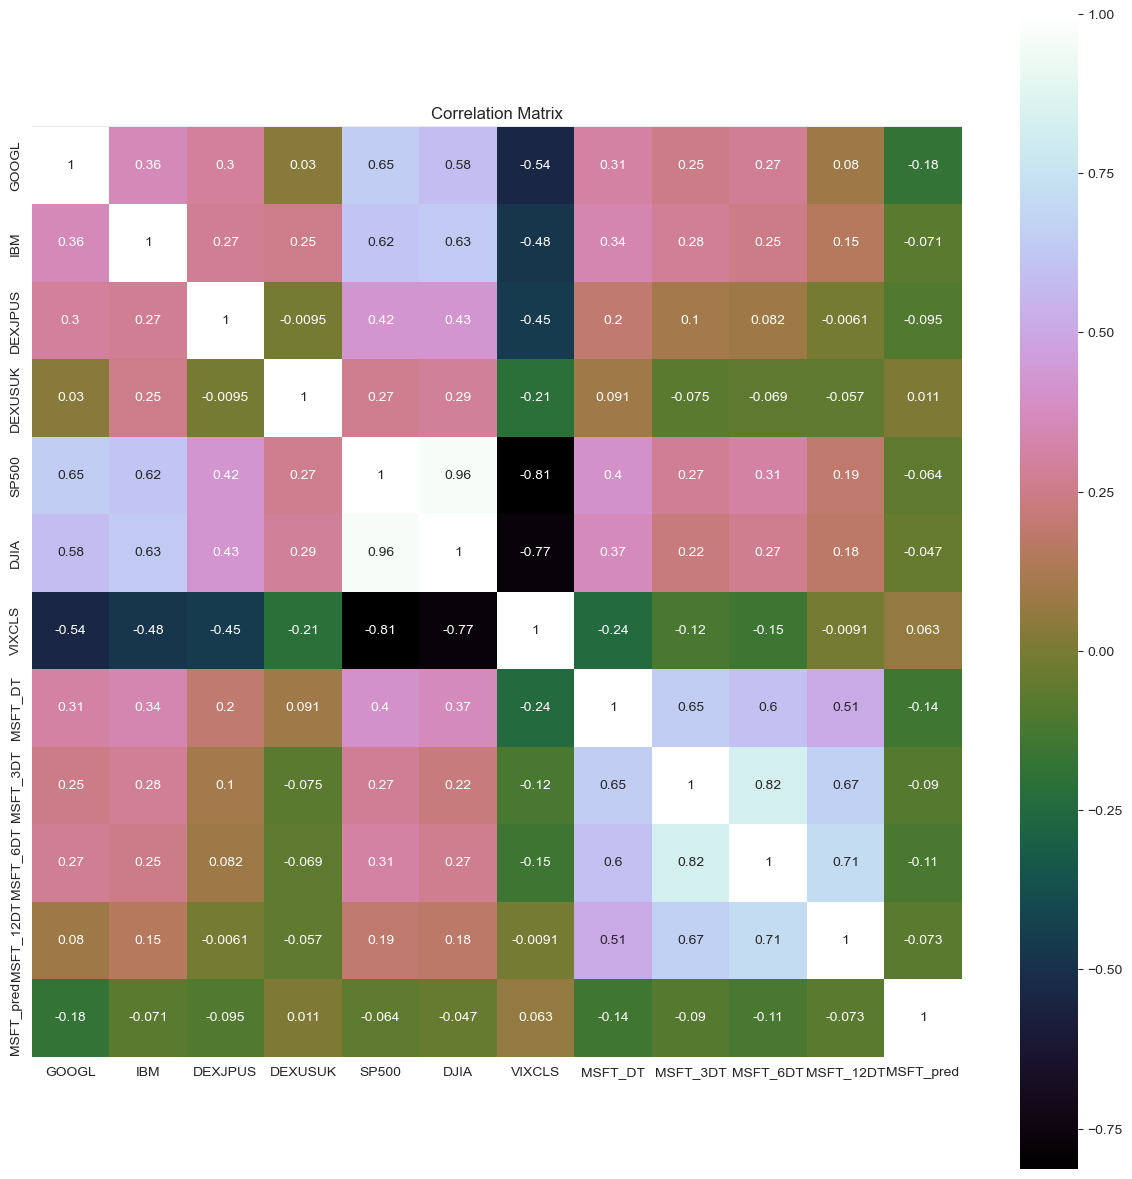

In [19]:
#Understand each variables and the correlation between them
#using scatter plot and correlation matrix
#Its important to know the correlation between independent variables also since some ML models like linear models can have poor performance of there are any highly correlated independant variables
correlation=dataset.corr()
#Plot the correlation matrix
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='cubehelix')

# Data Correlation
there are some correlation between the predicted varable and the MSFT lagged datas and there is a negetive correlation with VIX

<Figure size 1000x1000 with 0 Axes>

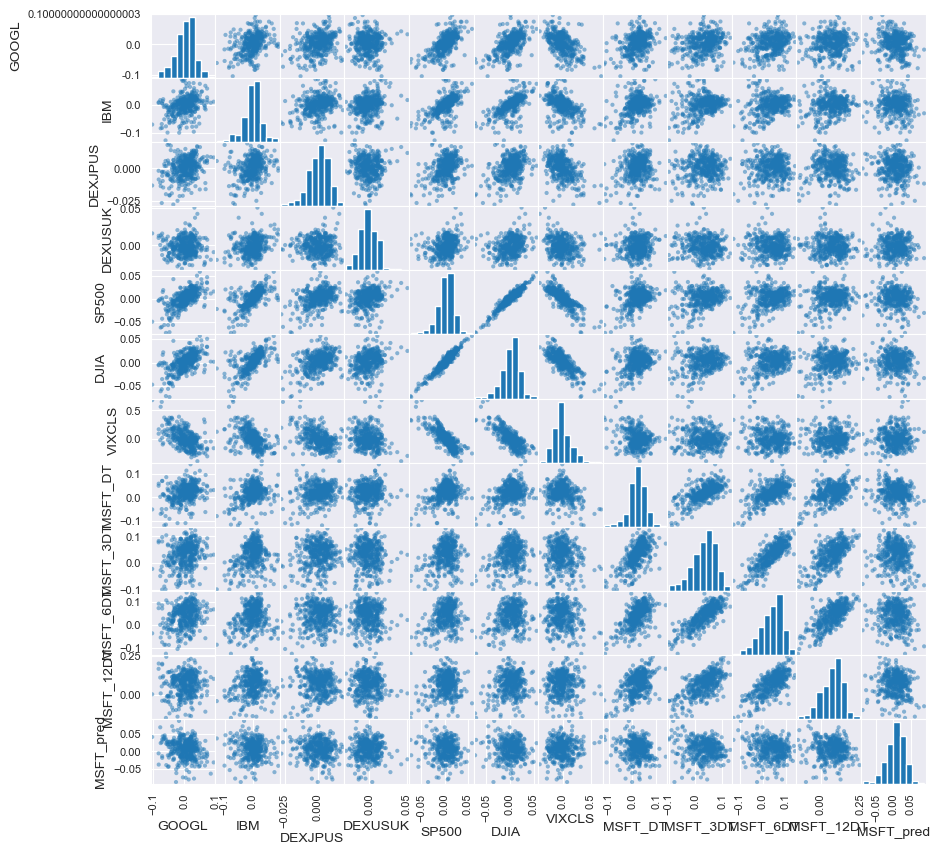

In [20]:
##Scatter plot of the dependent variable with the independent variables
pyplot.figure(figsize=(10,10))
scatter_matrix(dataset,figsize=(10,10))
pyplot.show()

## Time series Analysis
look at the decomposition of the time series into trend,seasonality and residual


In [21]:
#Description of the data
#pd.set_option('precision',3)
dataset.describe()

,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT,MSFT_pred
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,0.003390,-0.000584,0.000468,-0.001335,0.002285,0.001858,-0.005376,0.019907,0.031754,0.037475,0.070541,0.006124
std,0.031171,0.032028,0.007822,0.011366,0.018380,0.018936,0.153148,0.036195,0.043746,0.047319,0.068380,0.026402
min,-0.103727,-0.128395,-0.027639,-0.031473,-0.073122,-0.073269,-0.403987,-0.118304,-0.099111,-0.126519,-0.144401,-0.088984
25%,-0.013046,-0.015304,-0.004594,-0.008538,-0.006700,-0.008795,-0.098602,0.000094,0.004422,0.007277,0.025754,-0.011287
50%,0.005160,0.002391,0.001284,-0.001977,0.004650,0.004182,-0.017700,0.022757,0.038266,0.044636,0.080588,0.007959
75%,0.023716,0.017409,0.005943,0.006699,0.013964,0.013917,0.076256,0.044116,0.063377,0.072157,0.119998,0.023874
max,0.095724,0.092039,0.019115,0.050990,0.058992,0.056376,0.681887,0.139501,0.129874,0.138705,0.243810,0.088485


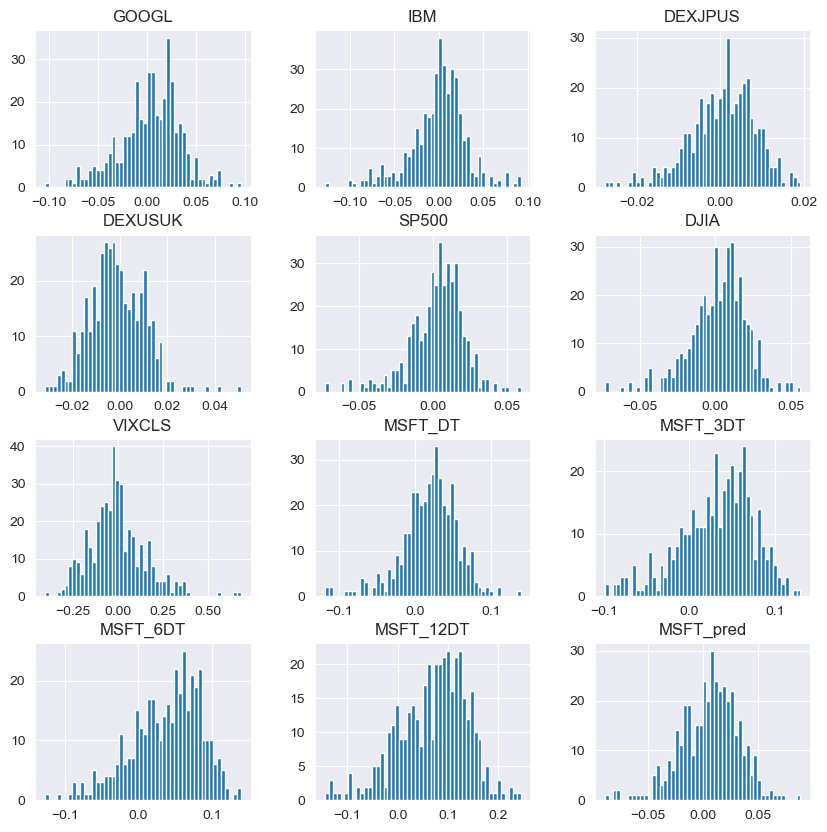

In [22]:
#Distribution of the data
dataset.hist(bins=50,figsize=(10,10))
pyplot.show()

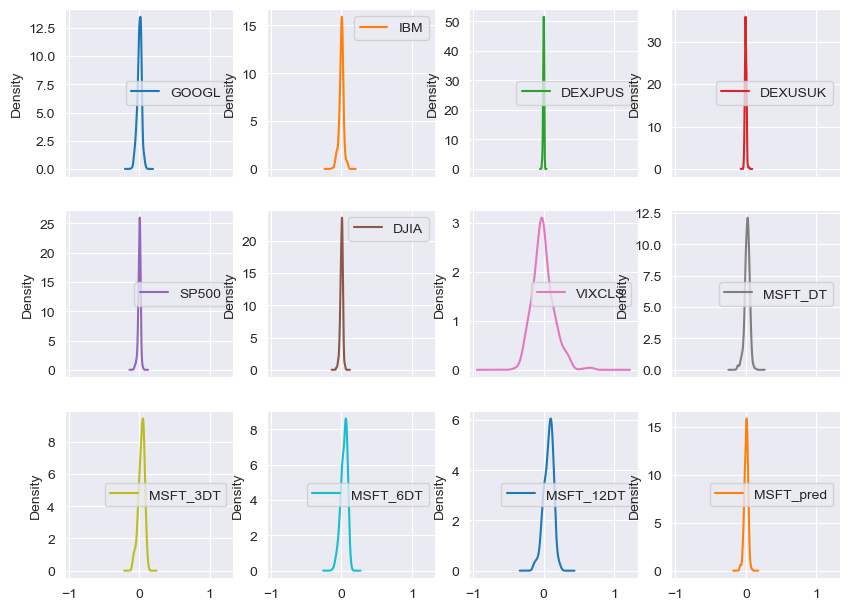

In [23]:
dataset.plot(kind='density',subplots=True,layout=(4,4),sharex=True,figsize=(10,10))
pyplot.show()

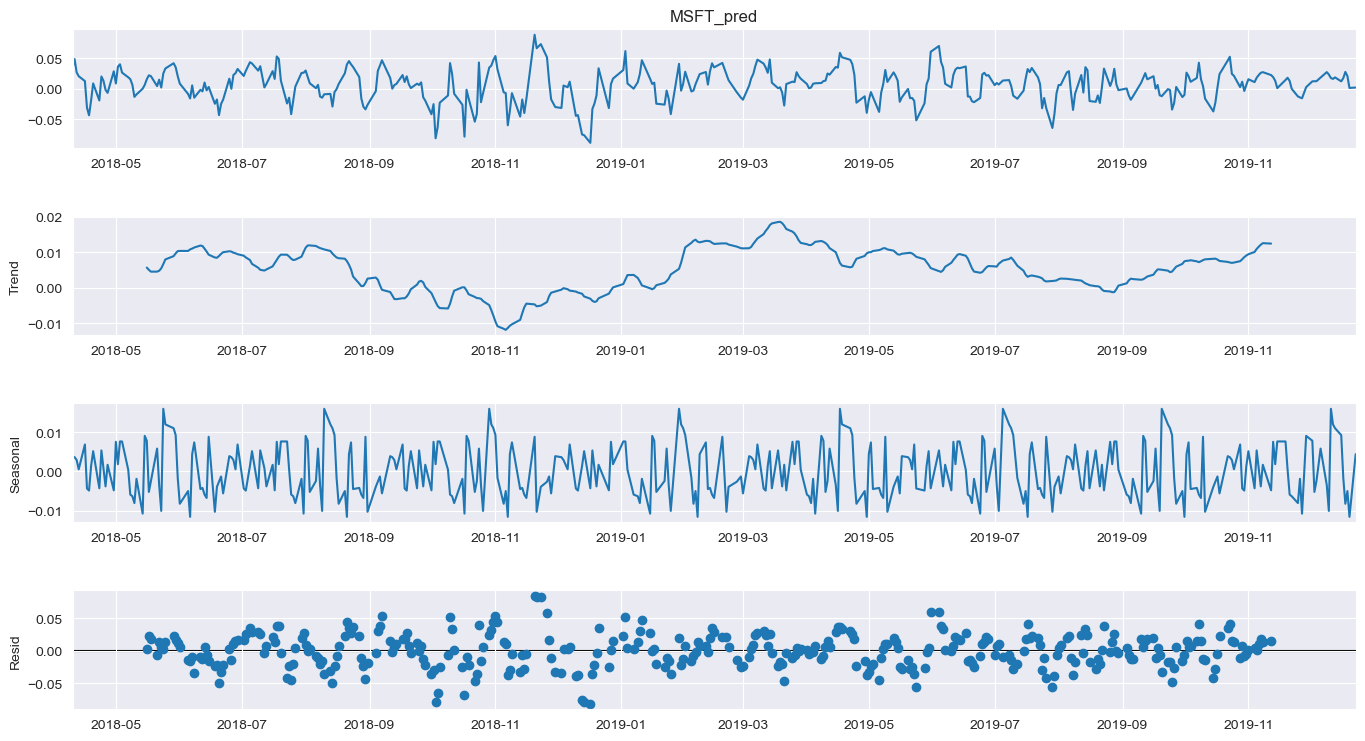

In [24]:
res=sm.tsa.seasonal_decompose(Y, period=52) #seasonal period is in weeks
fig=res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()
#Trends -long term trends
#Seasonality -short term trends
#Residual -random noise

## Data Preparation

In [25]:
#SelectKBest -select the best features based on the k highest scores
bestfeatures=SelectKBest(k=5,score_func=f_regression)
fit=bestfeatures.fit(X,Y)
dfscores=pd.DataFrame(fit.scores_)
dfColumns=pd.DataFrame(X.columns)
featureScores=pd.concat([dfColumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']
featureScores.nlargest(10,'Score').set_index('Specs')

,Score
Specs,
GOOGL,13.432476
MSFT_DT,8.360523
MSFT_6DT,5.351977
DEXJPUS,3.687600
MSFT_3DT,3.321477
MSFT_12DT,2.143578
IBM,2.055989
SP500,1.663656
VIXCLS,1.622143


We see that GOOGL and MSFT_DT are the best features and VIXCLS is the worst feature

## Evaluate the Algorithms and models


In [26]:
#Split data into train and test
validation_size=0.20
train_size=int(len(dataset)*(1-validation_size))
X_train,X_test=X[:train_size],X[train_size:]
Y_train,Y_test=Y[:train_size],Y[train_size:]

In [27]:
##Test Options and evaluation metrics
#To optimize the hyperparameters of the model we use 10 fold Cross validation  recalculate the results ten times to account for the inherent randomness in some of the models and the CV process. We will evaluate algorithms using the mean squared error metric. This will give a gross idea of how wrong all predictions are.
num_folds=10
seed=7
scoring='neg_mean_squared_error'


# Compare Models

In [28]:
#Supervised Learning Models
#Regression and Tree based models
#Neural Network  model
models= [('LR', LinearRegression()), ('LASSO', Lasso()), ('EN', ElasticNet()), ('KNN', KNeighborsRegressor()),
         ('CART', DecisionTreeRegressor()), ('SVR', SVR()), ('MLP', MLPRegressor()), ('ABR', AdaBoostRegressor()),
         ('GBR', GradientBoostingRegressor()), ('RFR', RandomForestRegressor()), ('ETR', ExtraTreesRegressor())]

In [29]:
#Ensemble methods
names=[]
cv_results=[]
train_results=[]
test_results=[]
for name,model in models:
    names.append(name)
    #Kfold cross validation
    kfold=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
    #Converting MSE to positive
    cv_result=-1*cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    cv_results.append(cv_result)

    #Train the model
    res=model.fit(X_train,Y_train)
    train_result=mean_squared_error(res.predict(X_train),Y_train)
    train_results.append(train_result)

    #Test the model
    test_res=mean_squared_error(res.predict(X_test),Y_test)
    test_results.append(test_res)

    msg="%s: %f (%f) %f %f" % (name, cv_result.mean(), cv_result.std(),train_result,test_res)
    print(msg)


LR: 0.000821 (0.000240) 0.000738 0.000328
LASSO: 0.000805 (0.000227) 0.000794 0.000304
EN: 0.000805 (0.000227) 0.000794 0.000304
KNN: 0.000840 (0.000301) 0.000535 0.000516
CART: 0.001376 (0.000432) 0.000000 0.001139
SVR: 0.000867 (0.000271) 0.000827 0.000370
MLP: 0.001084 (0.000322) 0.000990 0.000475
ABR: 0.000857 (0.000282) 0.000512 0.000334
GBR: 0.000866 (0.000279) 0.000158 0.000368
RFR: 0.000770 (0.000270) 0.000100 0.000354
ETR: 0.000726 (0.000259) 0.000000 0.000375


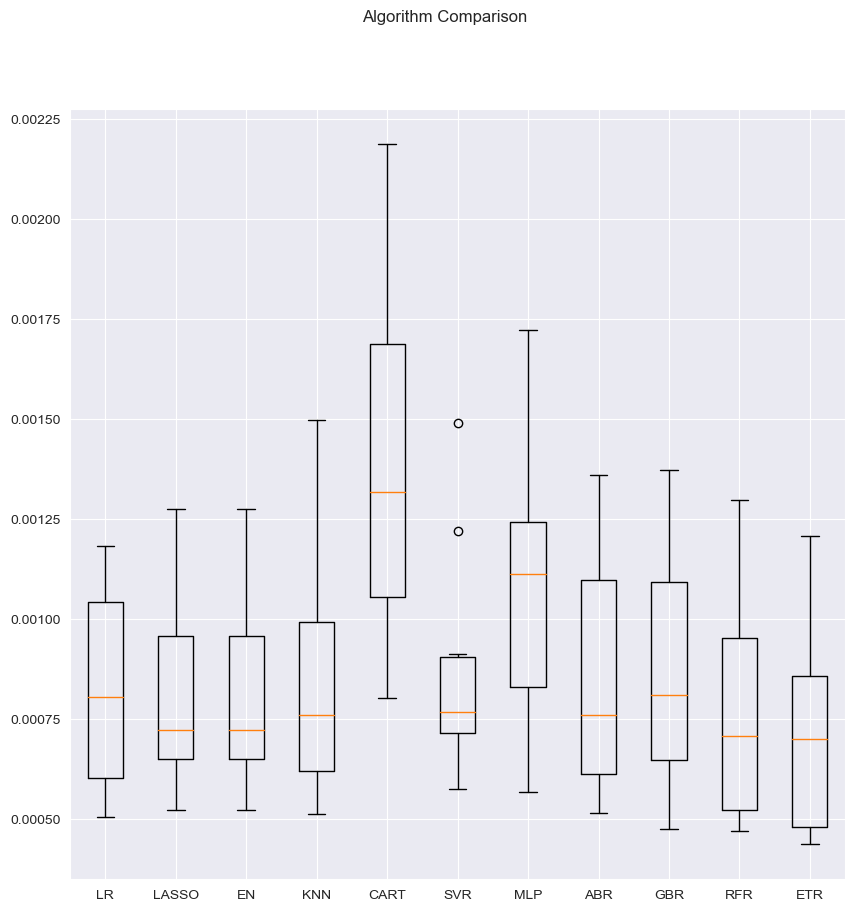

In [30]:
#Compare the models
fig=pyplot.figure(figsize=(10,10))
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
pyplot.boxplot(cv_results)
ax.set_xticklabels(names)
pyplot.show()

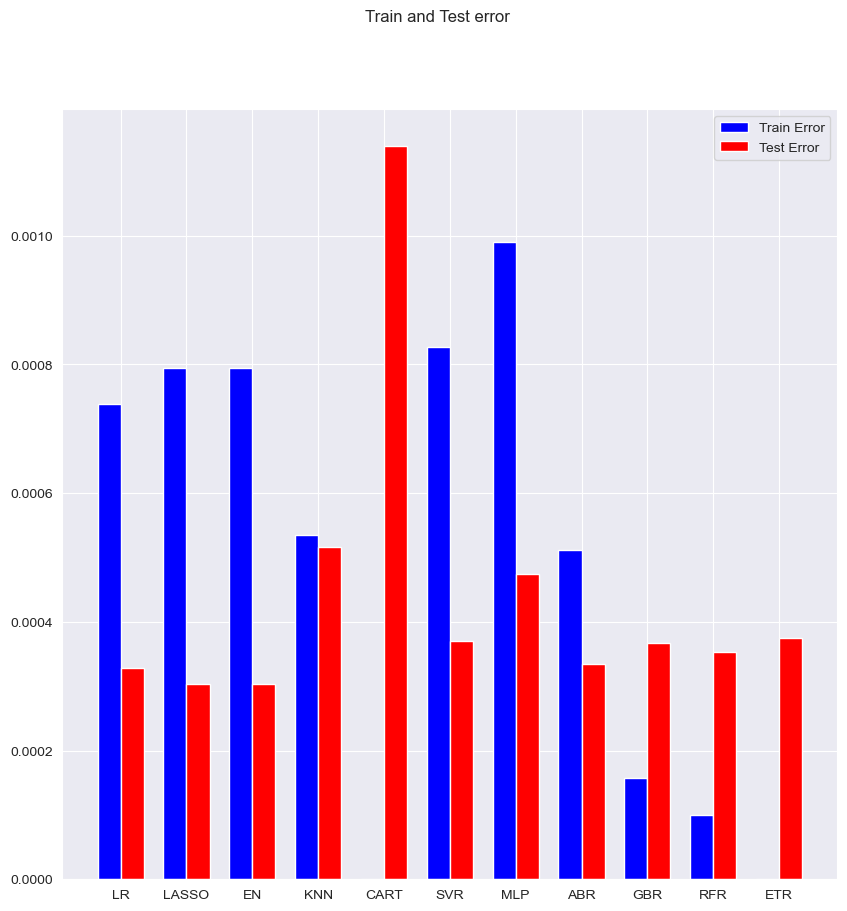

In [31]:
#Train and Test error
fig=pyplot.figure(figsize=(10,10))
fig.suptitle('Train and Test error')
ind=np.arange(len(names))
width=0.35
ax=fig.add_subplot(111)
pyplot.bar(ind-width/2,train_results,width,label='Train Error',color='b')
pyplot.bar(ind+width/2,test_results,width,label='Test Error',color='r')
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.legend()
pyplot.show()

We now look at some of the time series and deep learning models that can be used. Once we are done creating these, we will compare their performance against that of the supervised regression–based models. Due to the nature of time series models, we are not able to run a k-fold analysis. We can still compare our results to the other models based on the full training and testing results.

### Time Series Models-ARIMA and LSTM
For the time series–based models we do not need the lagged variables of MSFT as the independent variables. Hence, as a first step we remove MSFT’s previous returns for these models. We use all other variables as the exogenous variables in these models.

In [38]:
X_train_AR=X_train.loc[:,['GOOGL','IBM','DEXJPUS','VIXCLS','DJIA','SP500']]
X_test_AR=X_test.loc[:,['GOOGL','IBM','DEXJPUS','VIXCLS','DJIA','SP500']]
tr_len=len(X_train_AR)
ts_len=len(X_test_AR)
tot_len=len(X)


In [39]:
modelARIMA=sm.tsa.arima.ARIMA(endog=Y_train,exog=X_train_AR,order=(1,0,0))
model_fit=modelARIMA.fit()

C:\Users\jayak\anaconda3\envs\virtualenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jayak\anaconda3\envs\virtualenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jayak\anaconda3\envs\virtualenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jayak\anaconda3\envs\virtualenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

In [34]:
error_train_ARIMA=mean_squared_error(Y_train,model_fit.fittedvalues)
predictted_val=model_fit.predict(start=tr_len-1,end=tot_len-1,exog=X_test_AR)[1:]
error_test_ARIMA=mean_squared_error(Y_test,predictted_val)
error_test_ARIMA

C:\Users\jayak\anaconda3\envs\virtualenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


0.0003656084157676648